In [23]:
import gzip
import shutil
with gzip.open("sample_data/letter.data.gz", 'rb') as f_in:
    with open("letter.data", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [24]:
!pip3 install numpy==1.26.4 neurolab matplotlib

In [25]:
# Import Libraries
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

In [26]:
# file is already unzipped and saved as 'letter.data' file
input_file = 'letter.data'
# we will be using 30 samples from dataset
num_samples = 30
# training FNN model for 'e' 'f' 'g' 'h' characters
orig_labels = 'efgh'
num_orig_labels = len(orig_labels)

In [27]:
# Let's look at first line of data
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')
        print(list_vals)
        break

['1', 'o', '2', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '\n']


In [28]:
# actual data starts from idx 6 of each data row
start = 6
end = -1

In [29]:
# train data: 90% for train
num_train = int(0.9 * num_samples)
# remaining test data: num_samples - (90% of data)
num_test = num_samples - num_train

In [30]:
# file is already unzipped and saved as 'letter.data' file
input_file = 'letter.data'

# we will be using 30 samples from dataset
num_samples = 30

# training FNN model for 'e' 'f' 'g' 'h' characters
orig_labels = 'efgh'
num_orig_labels = len(orig_labels)

In [31]:
# Create data set
data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Sample data feature is split by tab character
        list_vals = line.split("\t")

        # Check if the label is part of training_labels 'e','f','g','h'
        if list_vals[1] not in training_labels:
            continue

        # 1. Extract the current label and append it to the label list:
        #    Neural network requires multi output like [0,0,0,1]
        #    We will first create empty label holder like [0,0,0,0]
        label = np.zeros((num_orig_labels, 1))
        # training_labels char is 'e' is at idx 0, label = [1,0,0,0]
        label[training_labels.index(list_vals[1])] = 1
        # append target/label to labels list to be used for train/test
        labels.append(label)

        # 2. Extract the training data and append it to the data list:
        #    feature data is stored from start(index: 6) ~ end(index: -1)
        cur_char_pixel_data = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char_pixel_data)  # append to training data

        # 3. Exit the loop once the required dataset has been created
        if len(data) >= num_samples:
            break

# Convert the data and labels to numpy arrays
data = np.asarray(data)
labels = np.array(labels).reshape(num_samples, num_orig_labels)

# Extract the number of dimensions (i.e. length of pixels in 1D array)
num_feat_dims = len(data[0])


In [32]:
# Create a FFN to perform OCR
# [Input] layer: inputs are either 0 or 1 for number of feature inputs
input_layer = [[0, 1] for _ in range(num_feat_dims)]

# [Hidden + output] layer: 3 > 3 neurons hidden layers and 4 for output
hidden_output_layer = [3, 3, num_orig_labels]

nn = nl.net.newff(input_layer, hidden_output_layer)
print("Input: ", nn.ci)
print("Output: ", nn.co)

# Set the training optimizer to gradient descent
nn.trainf = nl.train.train_gd


Input:  128
Output:  4


In [33]:
# Train the network
error_progress = nn.train(data[:num_train, :], labels[:num_train, :],
                          epochs=500, show=100, goal=0.001)


Epoch: 100; Error: 0.021598300029319558;
Epoch: 200; Error: 0.010047651996984423;
Epoch: 300; Error: 0.006581862588973691;
Epoch: 400; Error: 0.004905877283219091;
Epoch: 500; Error: 0.003915656532300445;
The maximum number of train epochs is reached


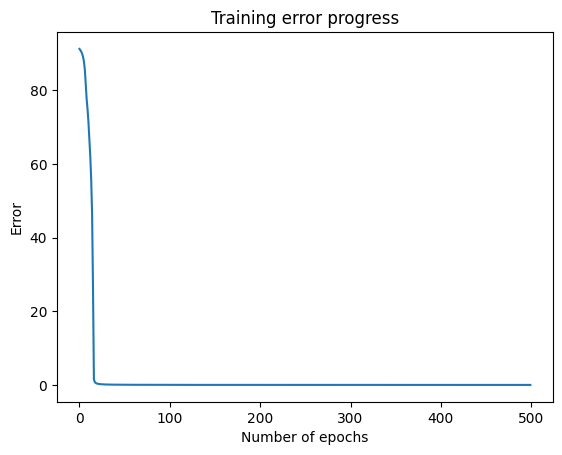

In [34]:
# Plot the error over epochs
plt.figure()
plt.title('Training error progress')
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(error_progress)
plt.show()


In [35]:
# Predict the output for test inputs
print('\nTesting on unknown data:')
predicted_test = nn.sim(data[num_test:, :])
for i in range(num_test):
    print('\nOriginal:', training_labels[np.argmax(labels[i])])
    print('Predicted:', training_labels[np.argmax(predicted_test[i])])



Testing on unknown data:

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g


In [36]:
# Calculate the accuracy of the predictions
correct = 0
for i in range(num_test):
    ground_truth_label = training_labels[np.argmax(labels[i])]
    predicted_label = training_labels[np.argmax(predicted_test[i])]
    if ground_truth_label == predicted_label:
        correct += 1

accuracy = correct / num_test
print("Accuracy: ", accuracy * 100, "%")


Accuracy:  100.0 %


Vibe Coding

Neural Network Classifier for Handwritten Characters

Scenario:
 You're a software engineer building an OCR (Optical Character Recognition) tool for a postal service. The machine needs to automatically classify letters on scanned envelopes, but only for the most common misread characters: E, F, G, and H.

Dataset:
 The file letter.data is already loaded in the root folder. It contains tab-separated values where:

The second column is the character label ('e', 'f', 'g', 'h')

Starting from index 6 to the second-to-last column are pixel values (features)

Tasks:

Load and preprocess the dataset.

One-hot encode the character labels.

Create and train a Feedforward Neural Network using Neurolab.

Visualize training error.

Predict and evaluate model accuracy on test data.

Epoch: 100; Error: 10.52172181724933;
Epoch: 200; Error: 10.506368327871234;
Epoch: 300; Error: 10.501324925629072;
Epoch: 400; Error: 10.498304160731722;
Epoch: 500; Error: 10.495827223101688;
The maximum number of train epochs is reached


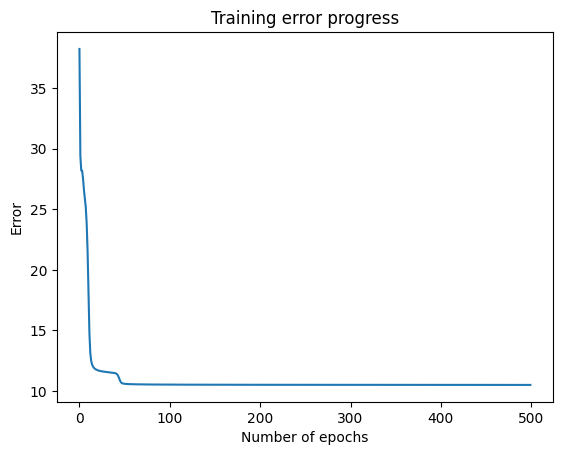


Testing on unknown data:

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g

Original: g
Predicted: g
Accuracy: 100.0 %


In [38]:
# Setup
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

input_file = 'letter.data'
orig_labels = 'efgh'
training_labels = list(orig_labels)
num_orig_labels = len(orig_labels)
num_samples = 30
start, end = 6, -1

# Load data
data, labels = [], []
with open(input_file, 'r') as f:
    for line in f.readlines():
        list_vals = line.strip().split('\t')
        if list_vals[1] not in training_labels:
            continue
        label = np.zeros((num_orig_labels, 1))
        label[training_labels.index(list_vals[1])] = 1
        labels.append(label)
        pixel_data = np.array([float(x) for x in list_vals[start:end]])
        data.append(pixel_data)
        if len(data) >= num_samples:
            break

# Convert to arrays
data = np.asarray(data)
labels = np.array(labels).reshape(num_samples, num_orig_labels)
num_feat_dims = len(data[0])

# Split into train/test
num_train = int(0.7 * num_samples)
num_test = num_samples - num_train

# Create FFN
input_layer = [[0, 1]] * num_feat_dims
hidden_output_layer = [3, 3, num_orig_labels]
nn = nl.net.newff(input_layer, hidden_output_layer)
nn.trainf = nl.train.train_gd

# Train model
error_progress = nn.train(data[:num_train, :], labels[:num_train, :],
                          epochs=500, show=100, goal=0.001)

# Plot error
plt.figure()
plt.title("Training error progress")
plt.xlabel("Number of epochs")
plt.ylabel("Error")
plt.plot(error_progress)
plt.show()

# Predict
predicted_test = nn.sim(data[num_test:, :])
print("\nTesting on unknown data:")
for i in range(num_test):
    print("\nOriginal:", training_labels[np.argmax(labels[i])])
    print("Predicted:", training_labels[np.argmax(predicted_test[i])])

# Accuracy
correct = 0
for i in range(num_test):
    actual = training_labels[np.argmax(labels[i])]
    predicted = training_labels[np.argmax(predicted_test[i])]
    if actual == predicted:
        correct += 1

accuracy = correct / num_test
print("Accuracy:", accuracy * 100, "%")
